# **4.02 - K-Nearest Neighbors (KNN)**


In [ ]:
# Bibliotecas Externas
import os
import warnings
import pandas as pd

# Ignorando Warnings
warnings.filterwarnings("ignore")

# Bibliotecas Locais
os.chdir("../..")
from lib import plots, runner, util

# Definido Variáveis globais
N_SPLITS = 5
RANDOM_STATE = 51

# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)

## 1. Definição do Modelo

O K-NN é um algoritmo de aprendizado supervisionado simples e intuitivo. Ele classifica um novo ponto de dados com base na classe dos seus "K" vizinhos mais próximos no espaço de características. A classe mais comum entre esses vizinhos é atribuída ao novo ponto. Ainda assim, é considerado um algoritmo "preguiçoso", pois não aprende um modelo explícito, mas armazena os dados de treinamento e realiza a classificação apenas quando necessário, não havendo um treinamento propriamente dito, apenas uma comparação entre os dados de treinamento.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

## 2. Configuração de Hiperparâmetros


In [8]:
param_distributions_knn = {
    'n_neighbors': [3, 5, 7, 10, 15, 20, 25],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'cosine'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2, 3]
}



Para o K-NN avaliamos os seguintes hiperparâmetros: n_neighbors, weights e metric. O primeiro parâmetro está relacionado a variação no número de vizinhos utilizados para classificar o novo dado do modelo. Variamos entre 3 e 15 o que permite  explorar diferentes níveis de suavização da decisão, equilibrando a sensibilidade a ruídos e a capacidade de generalização do modelo. Valores menores tornam o modelo mais suscetível a overfitting, enquanto valores maiores podem levar a underfitting, daí a necessidade de um intervalo que abranja diversas possibilidades.

Já o parâmetro “Weights” com as opções 'uniform' e 'distance' possibilita avaliar se a distância dos vizinhos é um fator relevante para a classificação. A primeira atribui igual importância a todos os vizinhos, enquanto a ponderação por distância confere maior peso aos vizinhos mais próximos, permitindo que o modelo capture nuances nas relações entre os dados.

Por fim, a escolha das métricas de distância ('euclidean', 'manhattan', 'minkowski') visa explorar diferentes formas de medir a similaridade entre os pontos de dados. A distância euclidiana, a mais comum, mede a distância em linha reta, enquanto a distância Manhattan considera a soma das diferenças absolutas nas coordenadas. Já a métrica Minkowski generaliza ambas, permitindo ajustar a sensibilidade a diferentes dimensões dos dados. Assim a variação dessas métricas permite identificar qual delas melhor se adapta à distribuição e à natureza dos dados, otimizando a capacidade do modelo de capturar padrões relevantes.

## 3. Avaliação do Modelo

O modelo KNN foi configurado com os melhores parâmetros para otimizar seu desempenho, como o uso do algoritmo ball_tree, com a métrica de distância manhattan e ponderação por distância. Esses parâmetros foram selecionados para explorar a capacidade do KNN de encontrar os vizinhos mais próximos de maneira eficiente, especialmente em dados com alta dimensionalidade. O desempenho do modelo foi consistente, especialmente nos dados de treinamento, com uma acurácia de 100%. No entanto, ao avaliar os resultados em dados de validação e teste, o desempenho caiu ligeiramente, o que levanta uma possível indicação de overfitting nos dados de treinamento, onde o modelo está excessivamente ajustado aos dados de treino, mas não generaliza tão bem para novos dados.

A curva ROC gerada pelo modelo KNN mostrou um desempenho bastante próximo da média, o que indica que o modelo tem uma boa capacidade de discriminação, mas não se destaca de maneira notável entre os outros modelos avaliados. A área sob a curva (AUC) foi de 0.8142, o que é um bom indicativo de que o modelo tem uma boa habilidade em distinguir entre as classes. Em termos de matriz de confusão, o modelo apresentou um número de erros relativamente baixo, o que sugere que o modelo foi capaz de classificar as instâncias corretamente na maior parte do tempo, embora ainda haja margem para melhoria, especialmente em relação à precisão nas classes minoritárias.

Quando comparamos as métricas de desempenho, a variação das médias entre os modelos não foi muito significativa, mas a diferença entre os resultados médios e o máximo valor alcançado de cada métrica chamou atenção. Por exemplo, a acurácia foi de 100% durante o treinamento, mas essa performance não foi mantida nos dados de validação (aproximadamente 81%) e teste (aproximadamente 82%). Essa discrepância pode sugerir que o modelo foi altamente otimizado para o conjunto de treinamento, mas teve dificuldades em generalizar bem para os dados de validação e teste. Além disso, a pontuação F1 e o recall também mostraram uma leve diminuição em comparação com os melhores valores gerais, sugerindo uma certa instabilidade na performance ao se mover de um conjunto de dados para outro.

O desempenho do modelo KNN nos **K-Folds** mostrou-se muito semelhante ao desempenho observado nos outros modelos, com pequenas variações entre as diferentes divisões dos dados. Isso indica que o modelo tem um bom grau de **consistência** em diferentes subconjuntos dos dados. As métricas de **acurácia**, **F1 score** e **AUC** não mostraram grandes flutuações entre os diferentes folds, o que sugere que o modelo tem uma capacidade razoável de generalização. No entanto, como vimos, as pequenas diferenças entre cada fold indicam que o modelo pode não ser completamente estável, e algumas iterações podem ser mais sensíveis a pequenas variações nos dados.

**Métricas do Melhor modelo:**

| Métrica | Melhor Valor Geral | Média | Desvio Padrão | Valor no Modelo Selecionado |
| --- | --- | --- | --- | --- |
| **Accuracy Train** | 1.0000 | 1.0000 | 0.0000 | **1.0000** |
| **Accuracy Val** | **0.8166** | 0.8149 | 0.0020 | 0.8145 |
| **Accuracy Test** | 0.8229 | 0.8165 | 0.0040 | **0.8229** |
| **F1 Score** | 0.7794 | 0.7685 | 0.0063 | **0.7794** |
| **AUC** | 0.8142 | 0.8056 | 0.0050 | **0.8142** |
| **Recall** | 0.7668 | 0.7469 | 0.0107 | **0.7668** |

**Melhor Combinação de Hiperparâmetros:**

```python
{
	'algorithm': 'ball_tree', 
	'metric': 'manhattan',  
	'n_neighbors': 5,  
	'weights': 'distance'
}
```


In [9]:
result, model, cv, loss, all_cv = runner.search_paramsv2(
    knn, param_distributions_knn, 'knn',
    [X_train, Y_train, X_val, Y_val, X_test, Y_test], n_iter=50)

df=pd.DataFrame((result.values()))
df

Realizando a Busca de Parâmetros por 20 iterações:   0%|          | 0/20 [00:00<?, ?it/s]

,params,score,model_time,accuracy_train,accuracy_val,accuracy_test,f1_score,recall,auc,fpr,tpr,model_path
0,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.888466,0.002006,1.0,0.816639,0.817878,0.769789,0.746339,0.806758,"[0.0, 0.132821962050868, 1.0]","[0.0, 0.7463386057410663, 1.0]",./models/knn/0.pkl
1,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.883989,0.021786,1.0,0.811140,0.807839,0.755027,0.725835,0.795093,"[0.0, 0.13564796124343964, 1.0]","[0.0, 0.7258347978910369, 1.0]",./models/knn/1.pkl
2,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.889658,0.001000,1.0,0.814009,0.816205,0.769692,0.752783,0.806347,"[0.0, 0.14008881711748083, 1.0]","[0.0, 0.7527826596367897, 1.0]",./models/knn/2.pkl
3,"{'weights': 'distance', 'p': 3, 'n_neighbors':...",0.888466,0.013001,1.0,0.816639,0.817878,0.769789,0.746339,0.806758,"[0.0, 0.132821962050868, 1.0]","[0.0, 0.7463386057410663, 1.0]",./models/knn/3.pkl
4,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.888466,0.012001,1.0,0.816639,0.817878,0.769789,0.746339,0.806758,"[0.0, 0.132821962050868, 1.0]","[0.0, 0.7463386057410663, 1.0]",./models/knn/4.pkl
5,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.887646,0.012998,1.0,0.814487,0.822897,0.779399,0.766842,0.814184,"[0.0, 0.13847396043601132, 1.0]","[0.0, 0.7668424135910955, 1.0]",./models/knn/5.pkl
6,"{'weights': 'distance', 'p': 3, 'n_neighbors':...",0.888466,0.016999,1.0,0.816639,0.817878,0.769789,0.746339,0.806758,"[0.0, 0.132821962050868, 1.0]","[0.0, 0.7463386057410663, 1.0]",./models/knn/6.pkl
7,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.888466,0.020998,1.0,0.816639,0.817878,0.769789,0.746339,0.806758,"[0.0, 0.132821962050868, 1.0]","[0.0, 0.7463386057410663, 1.0]",./models/knn/7.pkl
8,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.888466,0.016998,1.0,0.816639,0.817878,0.769789,0.746339,0.806758,"[0.0, 0.132821962050868, 1.0]","[0.0, 0.7463386057410663, 1.0]",./models/knn/8.pkl
9,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.889658,0.012995,1.0,0.814009,0.816205,0.769692,0.752783,0.806347,"[0.0, 0.14008881711748083, 1.0]","[0.0, 0.7527826596367897, 1.0]",./models/knn/9.pkl


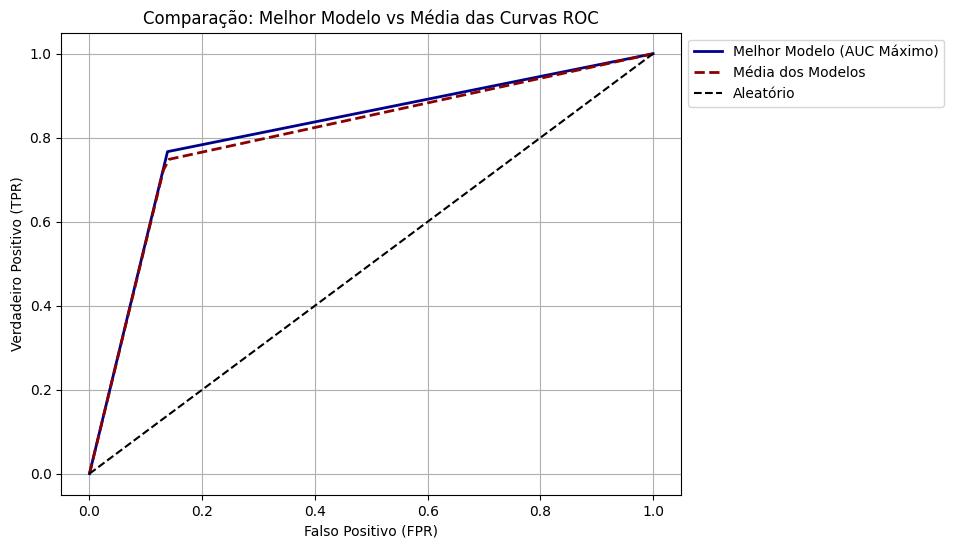

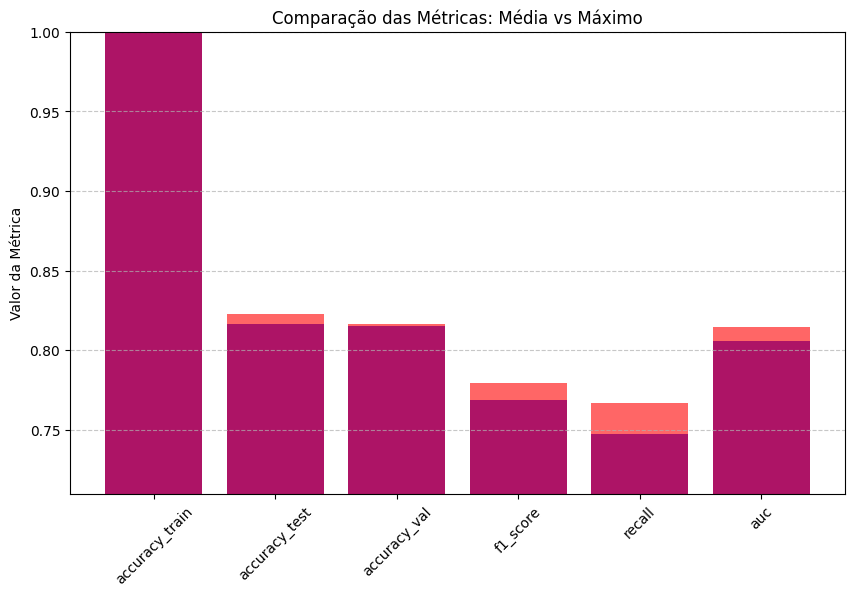

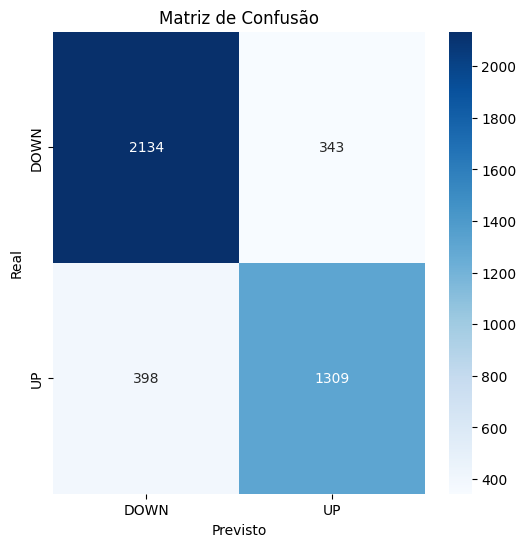

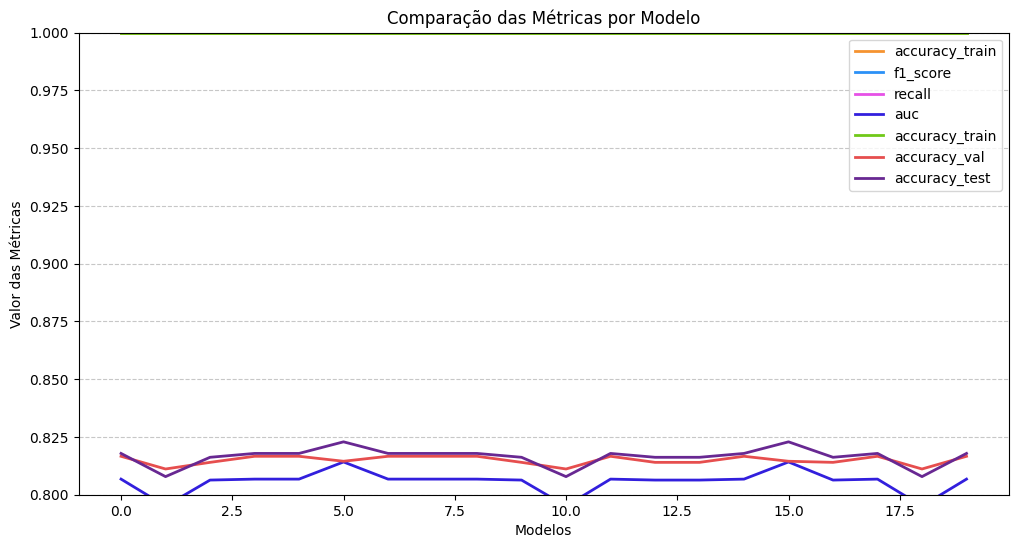

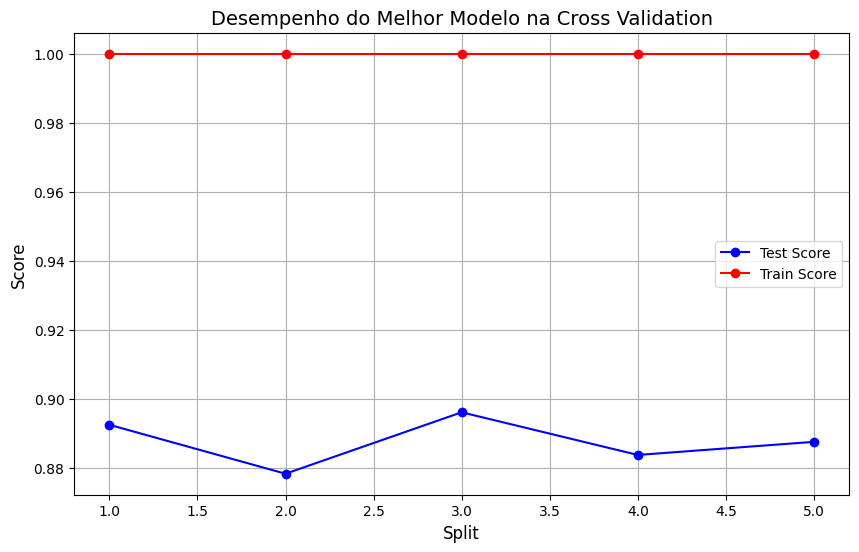

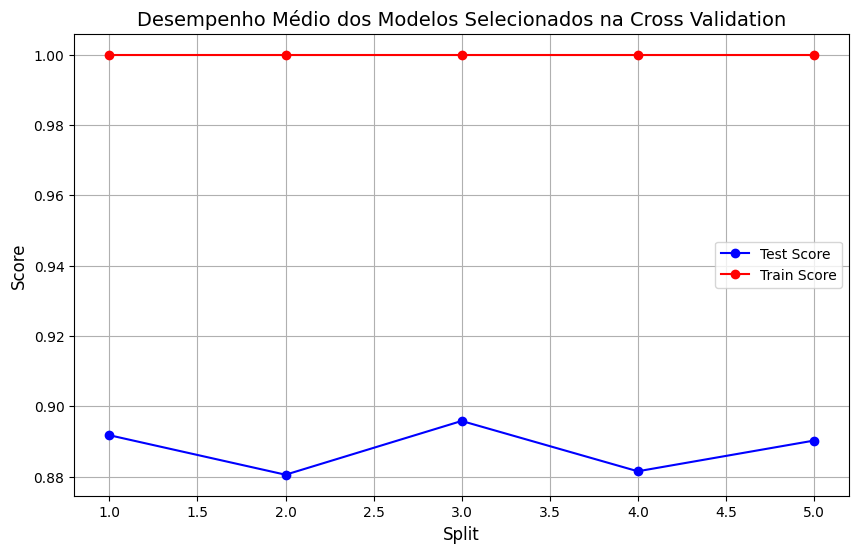

### Resultados do Modelo

**Melhores Parâmetros:**
```
{'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
```

#### Resultados das Métricas:
- **Accuracy train**:
  - **Melhor valor geral**: 1.0000
  - **Média**: 1.0000
  - **Desvio Padrão**: 0.0000
  - **Valor no Modelo Selecionado**: 1.0000

- **Accuracy val**:
  - **Melhor valor geral**: 0.8166
  - **Média**: 0.8149
  - **Desvio Padrão**: 0.0020
  - **Valor no Modelo Selecionado**: 0.8145

- **Accuracy test**:
  - **Melhor valor geral**: 0.8229
  - **Média**: 0.8165
  - **Desvio Padrão**: 0.0040
  - **Valor no Modelo Selecionado**: 0.8229

- **F1 score**:
  - **Melhor valor geral**: 0.7794
  - **Média**: 0.7685
  - **Desvio Padrão**: 0.0063
  - **Valor no Modelo Selecionado**: 0.7794

- **Auc**:
  - **Melhor valor geral**: 0.8142
  - **Média**: 0.8056
  - **Desvio Padrão**: 0.0050
  - **Valor no Modelo Selecionado**: 0.8142

- **Recall**:
  - **Melhor valor geral**: 0.7668
  - **Média**: 0.7469
  - **Desvio Padrão**: 0.0107
  - **Valor no Modelo Selecionado**: 0.7668



In [10]:
from IPython.display import display, Markdown

plots.show_best_roc(df)
plots.show_bar_metrics2(df)
plots.show_confusion_matrix(model, X_test, Y_test)
plots.show_metrics_comparison_line_plot(df)
plots.plot_cv_performance(cv, "Desempenho do Melhor Modelo na Cross Validation")
plots.plot_cv_performance(all_cv, "Desempenho Médio dos Modelos Selecionados na Cross Validation")
display(Markdown(util.generate_markdown_report(model, result.values())))